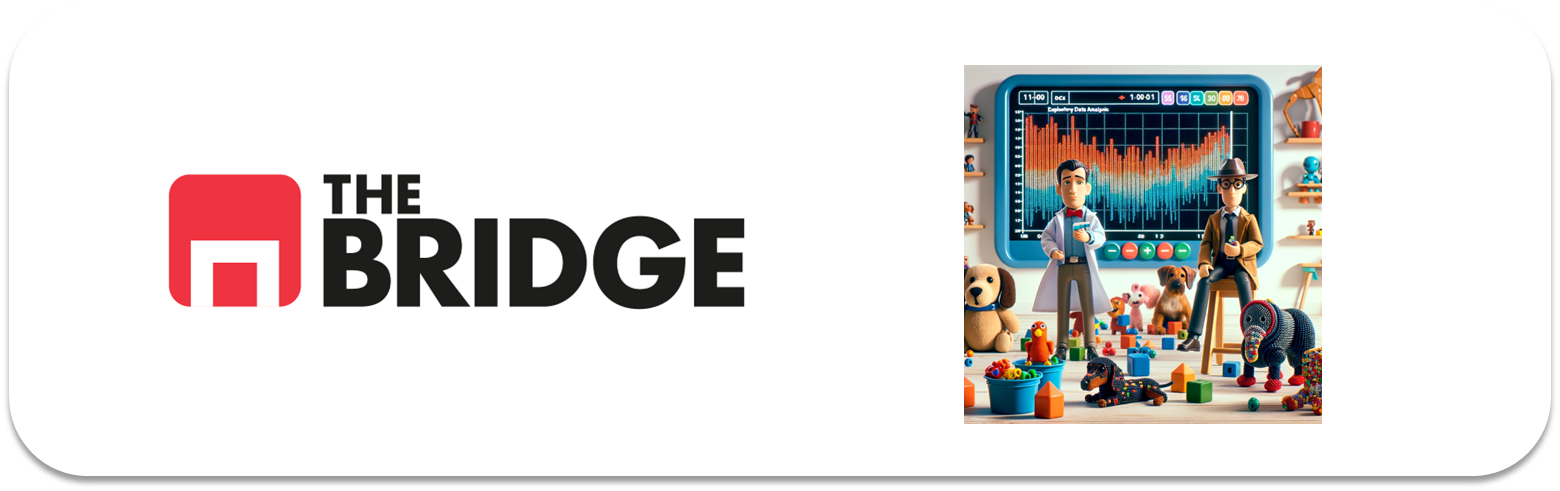

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

import bootcampviztools as viz
import datascience as ds

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
titanic = pd.read_csv('./data/titanic.csv')

display(titanic)
display(titanic.info())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


None

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
titanic.drop(columns=['deck', 'survived', 'pclass', 'embarked'], inplace=True)

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
titanic['family_members'] = titanic['parch'] + titanic['sibsp'] # número de parientes de cada pasajero
titanic.drop(columns=['parch', 'sibsp'], inplace=True)

In [5]:
titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [6]:
print('Valores del dataset:\n', titanic.embark_town.value_counts(dropna=False))

print('La moda es: ', titanic['embark_town'].mode()[0]) # Para ver el valor de la moda

titanic.fillna({'embark_town': titanic['embark_town'].mode()[0]}, inplace=True)

Valores del dataset:
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64
La moda es:  Southampton


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [7]:
is_man = titanic['who'] == 'man'
is_woman = titanic['who'] == 'woman'
is_child = titanic['who'] == 'child'

man_mean_age = round(titanic.loc[is_man, 'age'].mean(), 1)
woman_mean_age = round(titanic.loc[is_woman, 'age'].mean(), 1)
child_mean_age = round(titanic.loc[is_child, 'age'].mean(), 1)

titanic.loc[is_man, 'age'] = titanic.loc[is_man, 'age'].fillna(man_mean_age)
titanic.loc[is_woman, 'age'] = titanic.loc[is_woman, 'age'].fillna(woman_mean_age)
titanic.loc[is_child, 'age'] = titanic.loc[is_child, 'age'].fillna(child_mean_age)

In [8]:
titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Parte I:
- Vamos a ver que tipo de columnas tenemos en el dataset.
- Priorizar los datos en función de los objetivos. --> Se utiliza la variable "alive" para saber si un pasajero sobrevivió o no.

In [9]:
ds.get_cardinality_class(titanic)

,Card,%_Card,Tipo,Clase
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numérica Discreta
fare,248,27.833895,float64,Numérica Continua
class,3,0.3367,object,Categórica
who,3,0.3367,object,Categórica
adult_male,2,0.224467,bool,Binaria
embark_town,3,0.3367,object,Categórica
alive,2,0.224467,object,Binaria
alone,2,0.224467,bool,Binaria
family_members,9,1.010101,int64,Categórica


In [10]:
col_categoricas = ['sex', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone', 'family_members']
col_numericas = ['age', 'fare']

Parte II:
- Tendencia central
- Frecuencia de las variables categóricas. Gráficas de barras.
- Analizar las variables numéricas: descripción numérica, histogramas, KDE, plot-box.
    - Analizar outliers y tratarlos si es necesario

,age,fare,family_members
count,891.000000,891.000000,891.000000
mean,30.323199,32.204208,0.904602
std,13.064660,49.693429,1.613459
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,32.000000,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


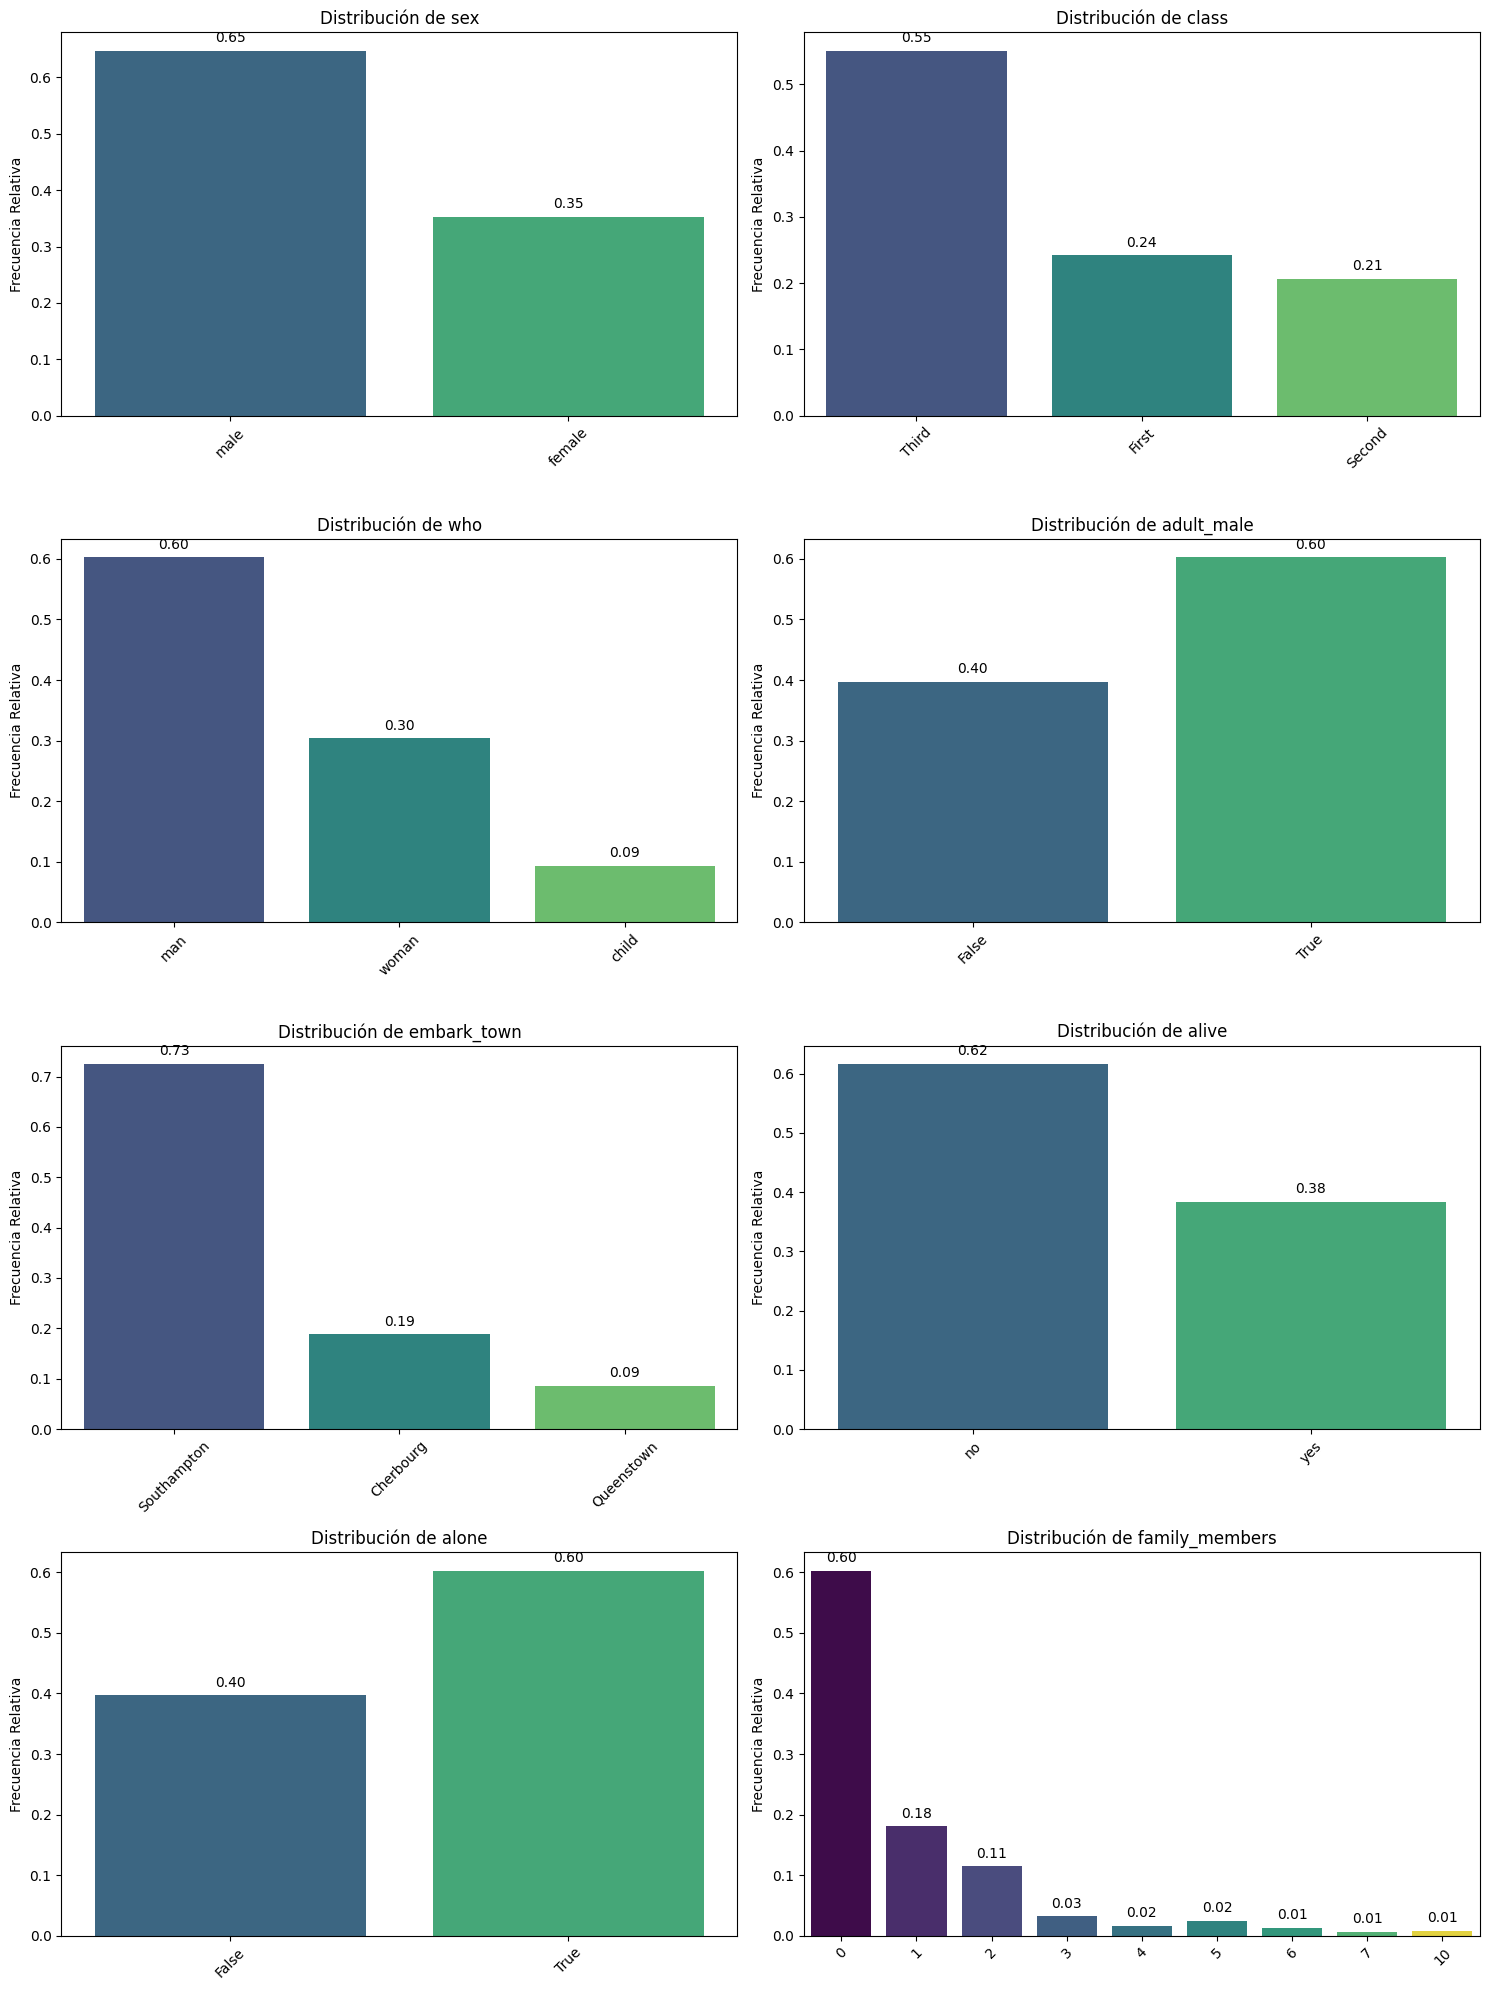

,age,fare,family_members
count,891.000000,891.000000,891.000000
mean,30.323199,32.204208,0.904602
std,13.064660,49.693429,1.613459
min,0.420000,0.000000,0.000000
25%,22.000000,7.910400,0.000000
50%,32.000000,14.454200,0.000000
75%,35.000000,31.000000,1.000000
max,80.000000,512.329200,10.000000


(2, 2)


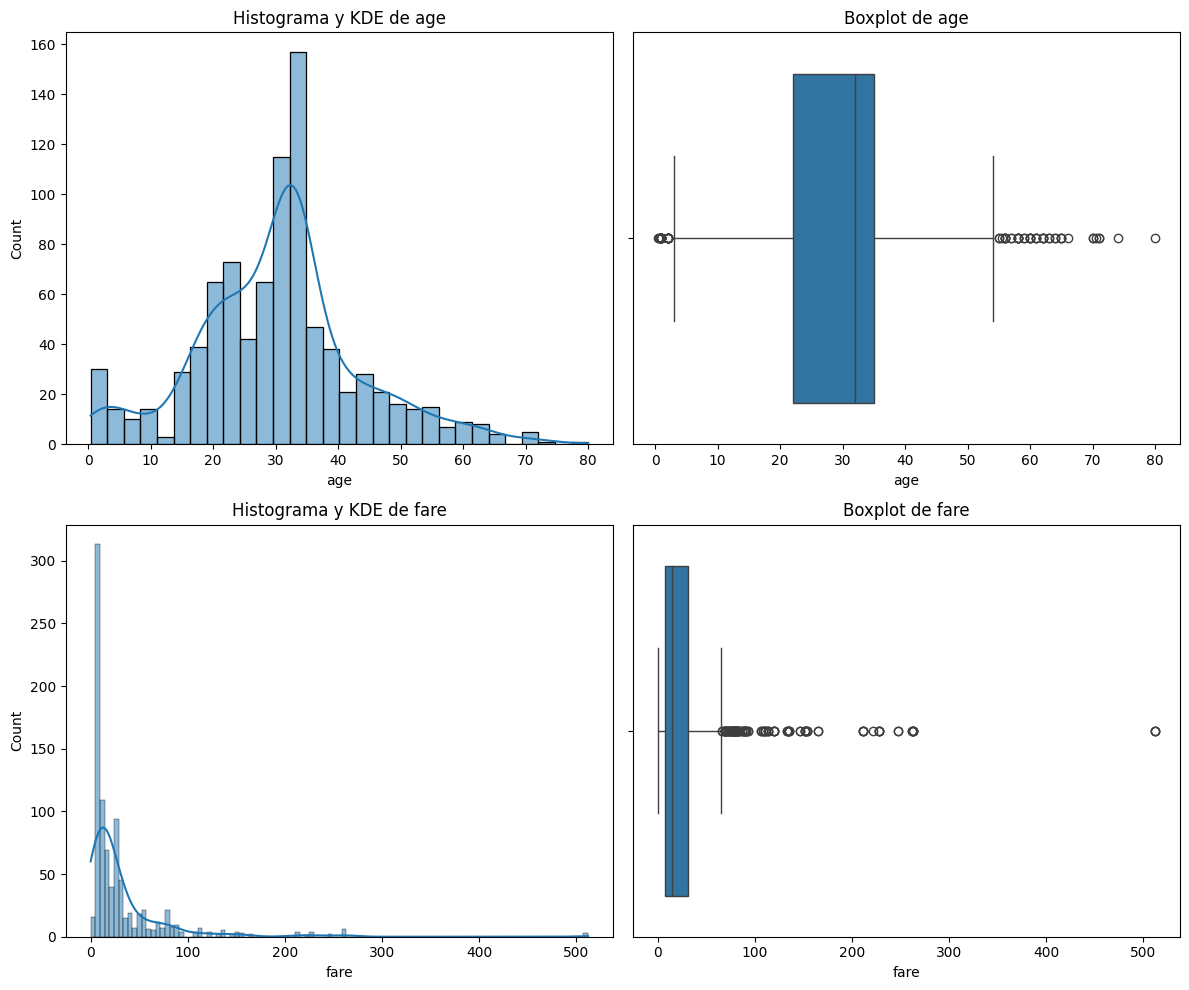

In [11]:
# Ver la tendencia centra de las variables numéricas
display(titanic.describe())

# Analizar las frecuencias de las variables categóricas independientemente
viz.plot_categorical_distribution(titanic, col_categoricas, relative=True)

# Analizar las variables numéricas y sus rangos
display(titanic.describe())

# Analizar histograma, KDE y box-plot de las variables numéricas
viz.plot_histogram_KDE_boxPlot(titanic, col_numericas)

Se ha realizado la primera inspección general del dataset. Algunas conclusiones independientes que se pueden ir presentando son:
- La cantidad de hombres en el barco es un 20% mayor que la de mujeres y niñxs juntas.
- La ciudad en la que más pasajeros embarcaron fue: Southamton.
- El 62% de los pasajeros no sobrevivió.
- El 60% de los pasajeros viajaba solo. Esto se puede ver tanto en "alone" como en "family_members".
- Hay valores outliers pero no los voy a descartar porque son razonables.
     - Personas con edades "extremas". Bebes y personas ancianas.
     - Tickes de precio nulo (probablemente trabajadores, u otra persona ha pagado su ticket), y muy caros (clase muy alta).

Parte III:
- Responder a los objetivos.
- Análisis bivariante
    - Categórica-Categórica
    - Categórica-Numérica
    - Numérica-Numérica
- Análisis por parejas. Se puede usar: matriz de correlación, heatmap, pairplot

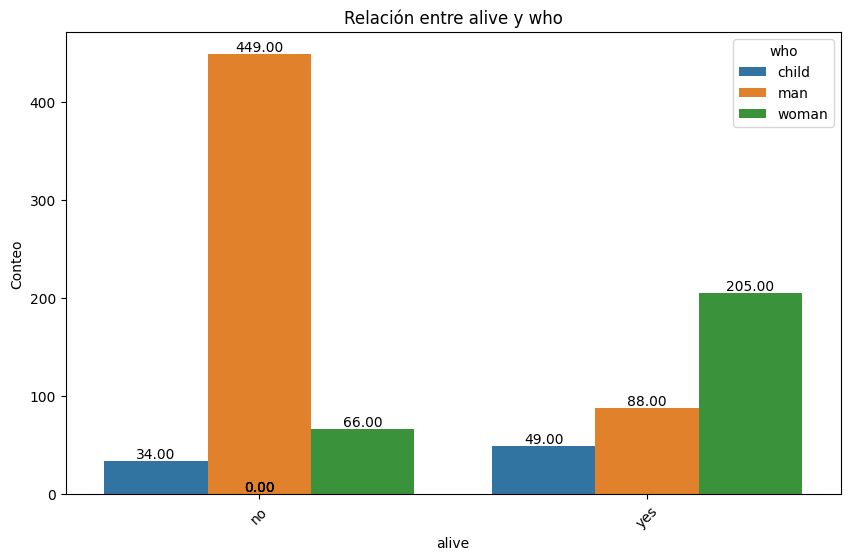

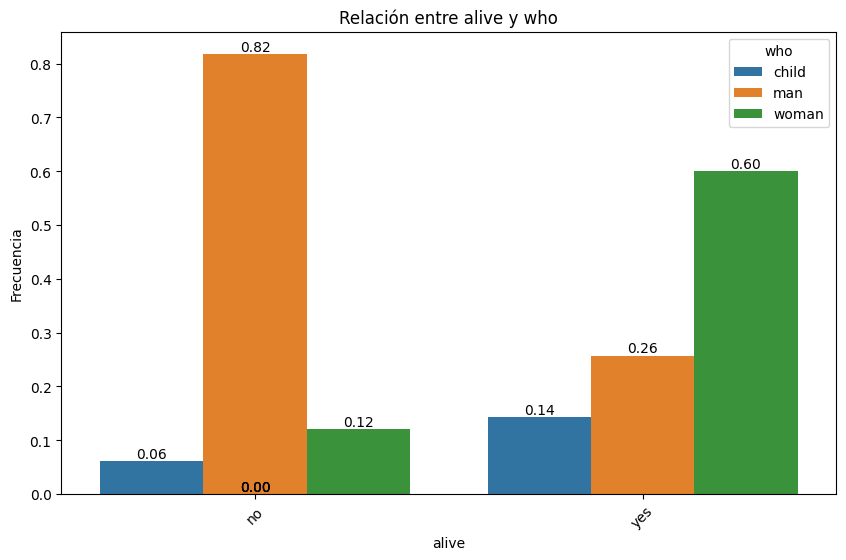

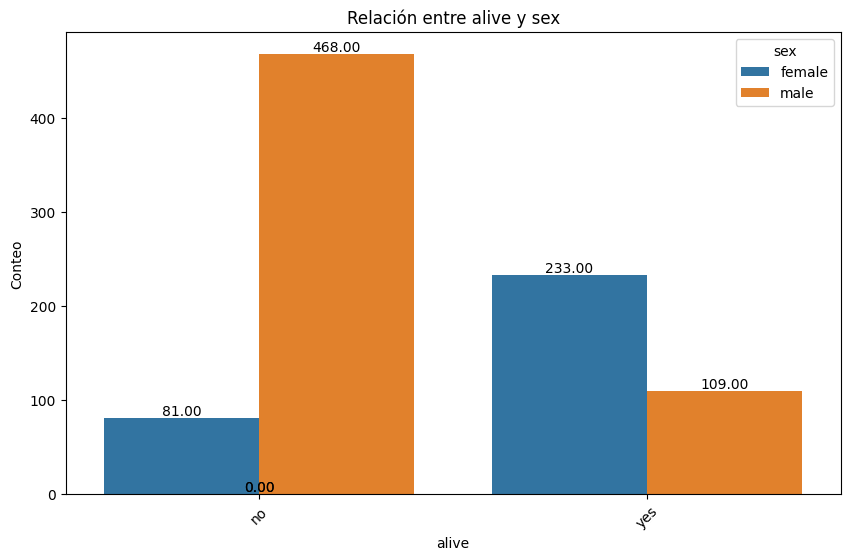

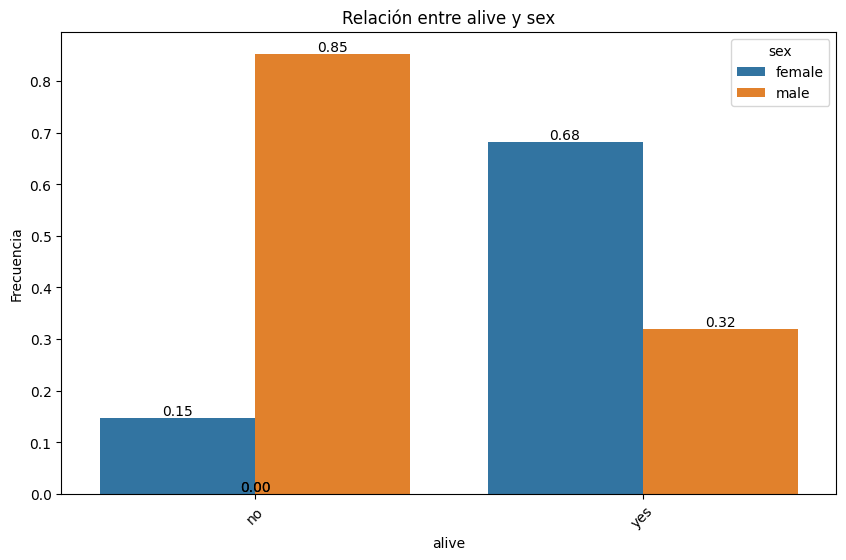

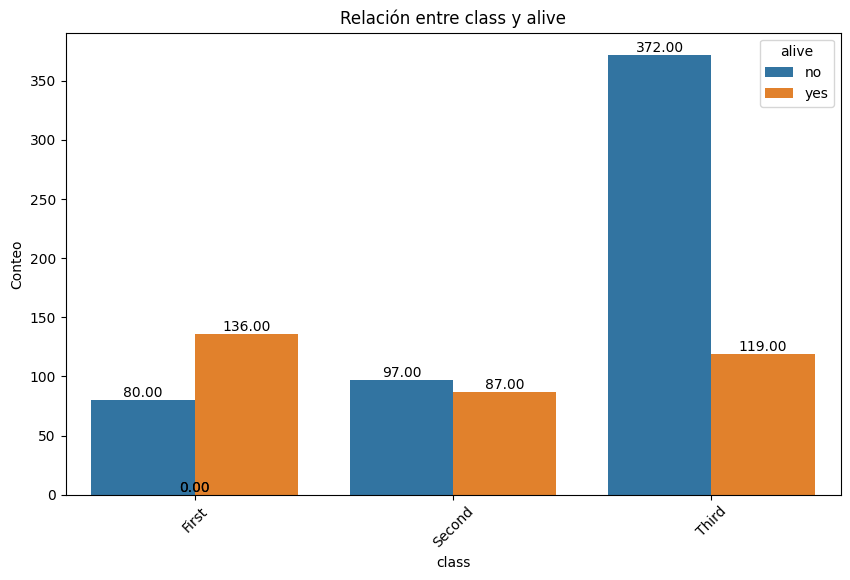

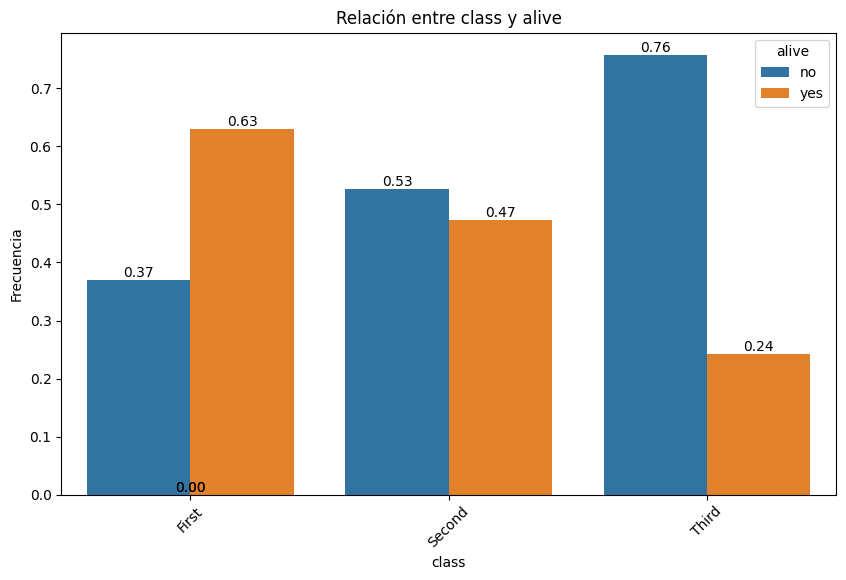

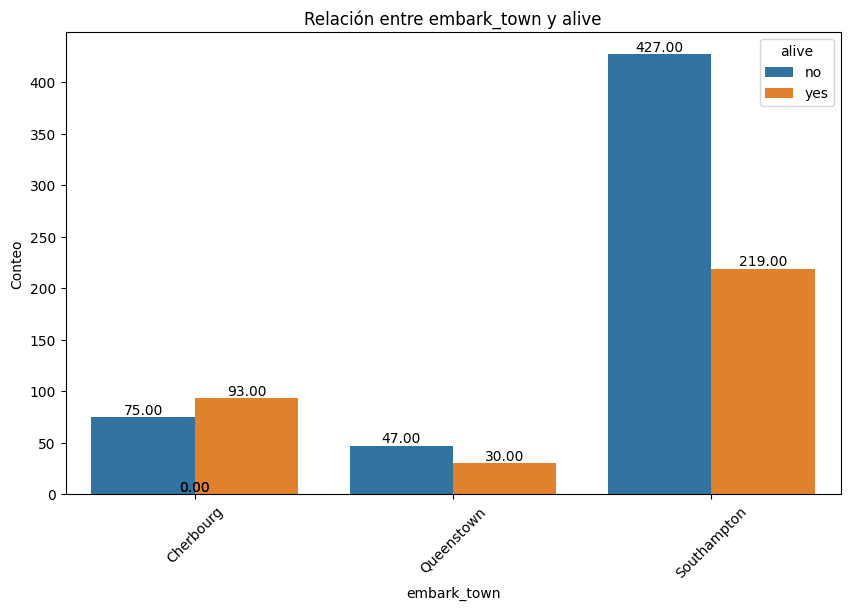

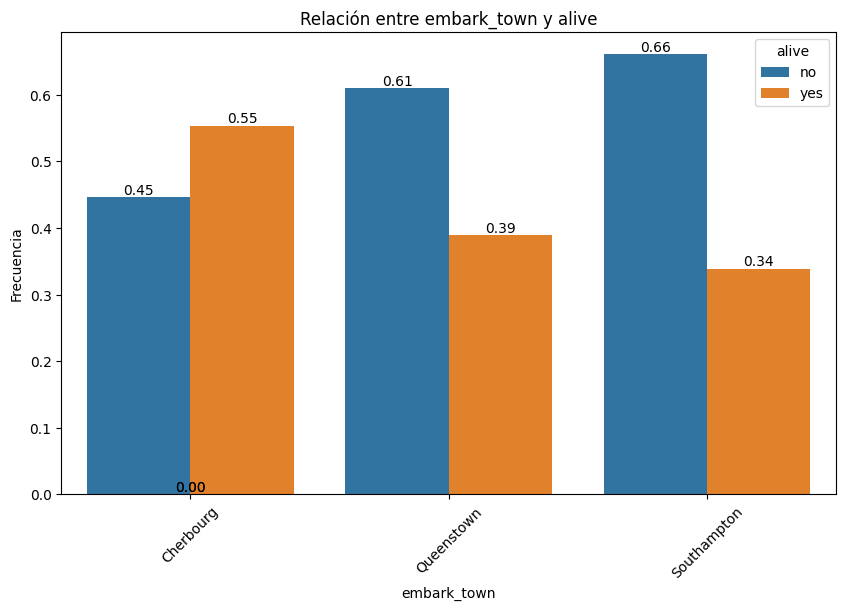

In [12]:
# Nota: Es importante el orden en que se comparan las columas al llamar a las funciones de "plot"

# Relación categórica "alive" - 'who' (absoluta y relativa)
viz.plot_categorical_relationship_fin(titanic, 'alive', 'who')
viz.plot_categorical_relationship_fin(titanic, 'alive', 'who', relative_freq=True)

# Relación categórica "alive" - 'sex' (absoluta y relativa)
viz.plot_categorical_relationship_fin(titanic, 'alive', 'sex')
viz.plot_categorical_relationship_fin(titanic, 'alive', 'sex', relative_freq=True)

# Relación categórica "class" - 'alive' (absoluta y relativa)
viz.plot_categorical_relationship_fin(titanic, 'class', 'alive')
viz.plot_categorical_relationship_fin(titanic, 'class', 'alive', relative_freq=True)

# Relación categórica "embark_town" - 'alive' (absoluta y relativa)
viz.plot_categorical_relationship_fin(titanic, 'embark_town', 'alive')
viz.plot_categorical_relationship_fin(titanic, 'embark_town', 'alive', relative_freq=True)


Conclusiones:
- Sexo
    - Sobrevivieron más mujeres (frente a hombres y niños), tanto en terminos absolutos (205 mujeres), como en relativos (60 %).
    - Estadísticamente se observa que ser mujer tiene ventajas para sobrevivir, frente al sexo masculino (hombres o niños incluidos).
    - En cualquier caso, los niñxs tiene un ratio de supervivencia muy bajo: 14 %.
- Clase
    - En terminos absolutos sobreviven más personas de primera clase: 136 personas. En terminos relativos también son los de mayor porcentaje de supervivencia. Estos tiene clara ventaja para sobrevivir.
    - Los pasajeros de tercera clase, que eran los más numeros, son también los que más bajas sufren (aboluta y relativamente).
- Ciudad
    - De Southampton sobrevivieron más personas (también es donde más embarcaron).
    - Pero porcentualmente la ciudad de donde más sobrevivieron fue de Cherbourg (55 %). Por tanto las personas que embarcan en esta ciudad tienen más posibilidades de sobrevivir.
    - Podría haber una relación con la clase social media de estas ciudades. Pero hay que analizarlo.


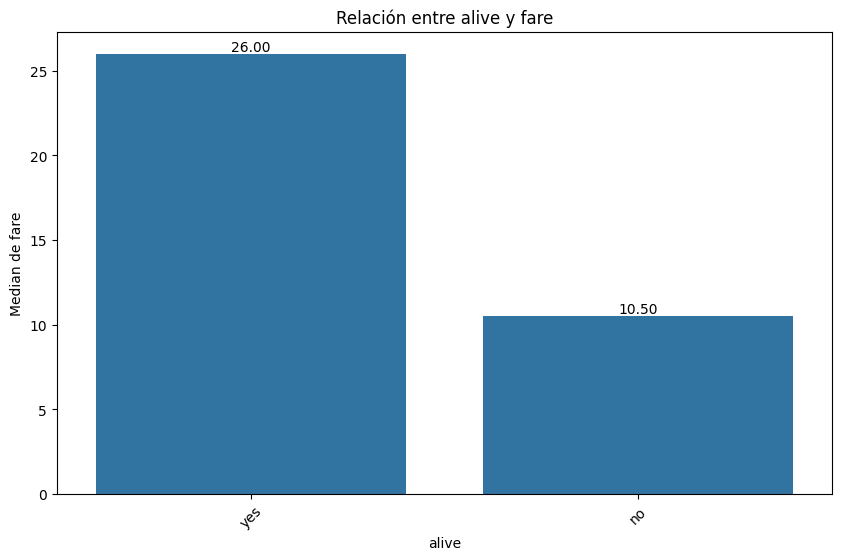

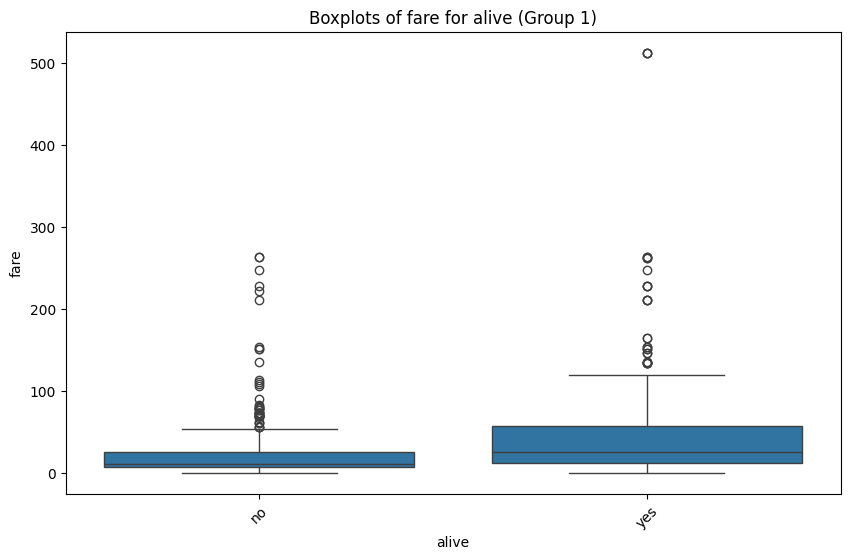

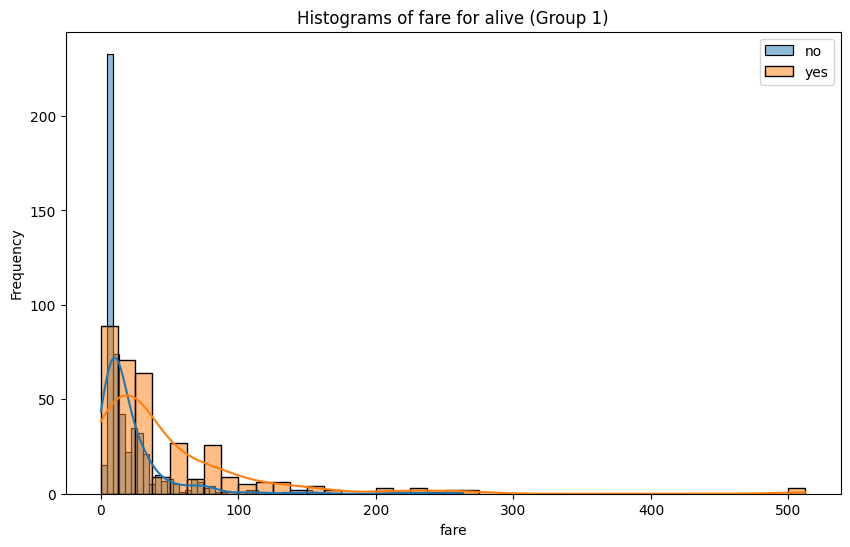

In [13]:
# Relación categórica - numérica --> "fare" - "alive".

# Para la relación uso la mediana porque elimina mejor los outlier
viz.plot_categorical_numerical_relationship(titanic, 'alive', 'fare', measure='median')

# Mostrar Box-Plots
viz.plot_grouped_boxPlots(titanic, 'alive', 'fare')

# Comparar histogramas
viz.plot_grouped_histograms(titanic, 'alive', 'fare', 2)

Conclusiones:
- Precio del billete
    - En líneas generales, las personas que sobrevivieron habían pagado un precio más alto por su billete. Esto lo vemos en la primera gráfica que muestra la mediana de los precios.
    - Reafirmando esto, del Box Plot y del histograma, las personas que no sobrevivieron habían pagado precios más bajos por su billete.
    - De las personas que no sobrevivieron, hay gente que no pagó nada por su ticket. Tengo tres hipótesis:
        - Otra persona pagó su billete.
        - Se colarón en el barco. Esta hipótesis me parece poco probable porque entonces no estarían registrados.
        - Eran trabajadores del barco. Por tanto no pagaban y debían abandonar los últimos el barco.
    - La persona que más dinero invirtió (> 500 $) sí sobrevivió.

De las gráficas obtenidas, hasta aquí podría concluirse también:
- Sí hay relación entre el billete pagado y la probabilidad de supervivenvia.
- También hay relación entre la ciudad de embarque y la probabilidad de supervivencia.
- ¿Pero hay relación entre el billete pagado y la ciudad de embarque?

Voy a apoyar estas conclusiones en un poco más de código.

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


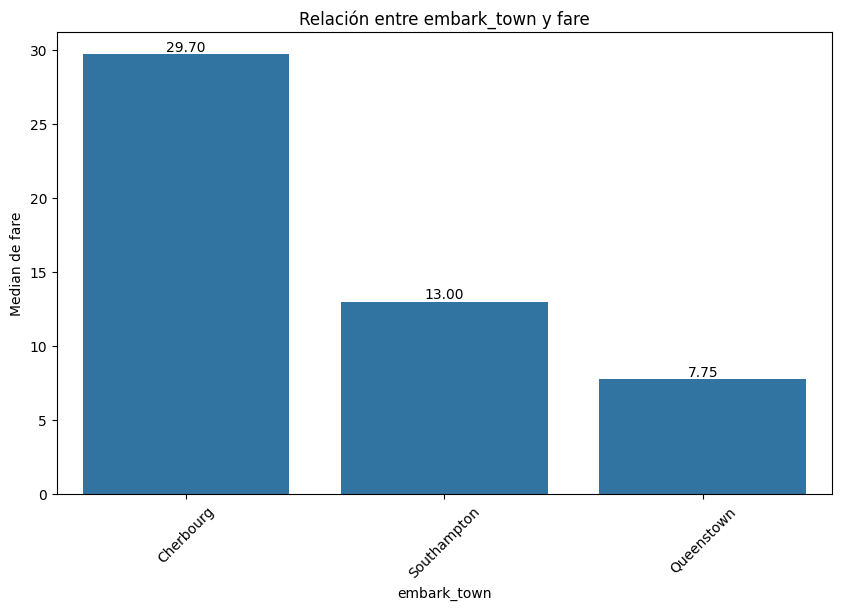

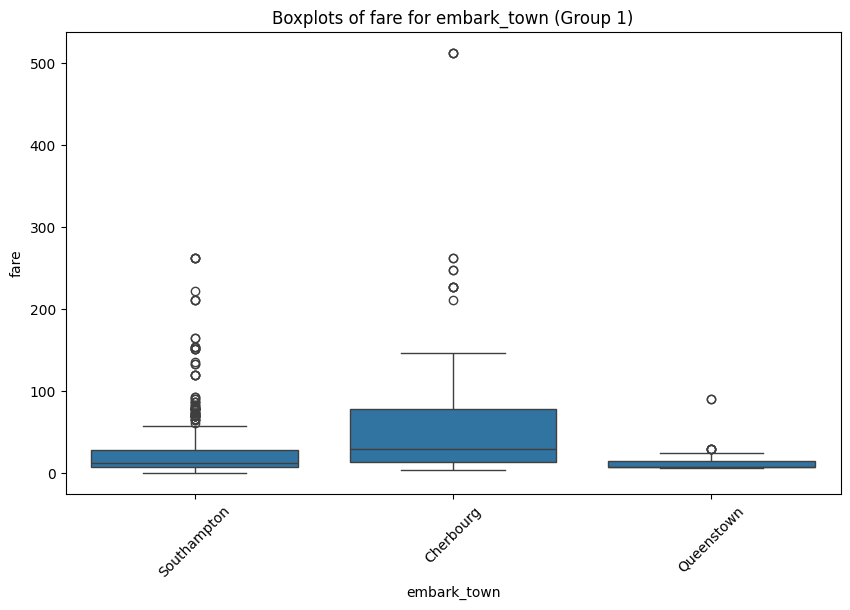

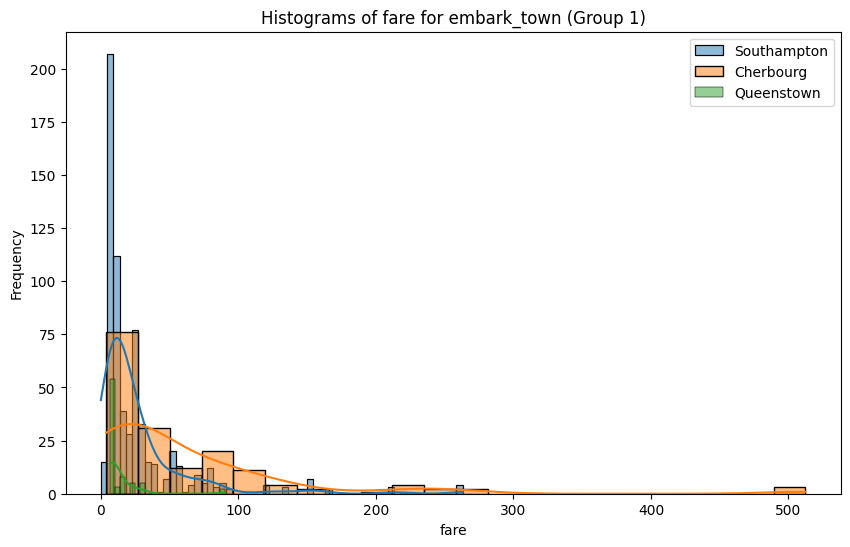

In [14]:
# ################################
#
# Variables "alive" y "fare"
#
# Test T-Student --> "fare" no tiene una distribución normal así que NO puedo aplicarlo
#
# Test U de Mann-Whitney  --> Hipótesis directora: no hay estadística significativa entre las medianas de los valores
# Lo voy a usar porque "alive" es binaria

# 1. Separar los datos en dos grupos según la variable categórica
grupo_a = titanic.loc[titanic.alive == "yes"]['fare']
grupo_b = titanic.loc[titanic.alive == "no"]['fare']

# 2. Aplicar la prueba y mostrar resultados
u_stat, p_valor = scipy.stats.mannwhitneyu(grupo_a, grupo_b)
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)


# ################################
#
# Variables "alive" y "emabark_town"
#
# Test Chi-2 porque ambas son categóricas --> Hipótesis directora: idependencia de variables
#
# Obtener la tabla de contingencia
tabla_contingencia = pd.crosstab(titanic['alive'], titanic['embark_town'], normalize=False)
display(tabla_contingencia)     # Es la misma gráfica relacional del primer apartado

# Método Chi-2
chi2, p, dof, expected = scipy.stats.chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

# ################################
#
# Variables "embark_town" y "fare" (categórica y numérica)

viz.plot_categorical_numerical_relationship(titanic, 'embark_town', 'fare', measure='median')
viz.plot_grouped_boxPlots(titanic, 'embark_town', 'fare')
viz.plot_grouped_histograms(titanic, 'embark_town', 'fare', 3)


Conclusiones:
- En el test U de Mann-Whitney, como p-valur << 0.05 --> Rechazamos la hipótesis directora --> "alive" y "fare" sí están relacionadas
- En el test Chi-2, como p-valur << 0.05 --> Rechazamos la hipótesis directora --> "alive" y "embark_town" sí están relacionadas
- Del análisis gráfico que relaciona "fare" con "embark_town" ha pagado precios más altos por sus billetes. La ciudad debe tener más clase alta. Y el outlier de más de 500 $ también pertenece a esa ciudad.

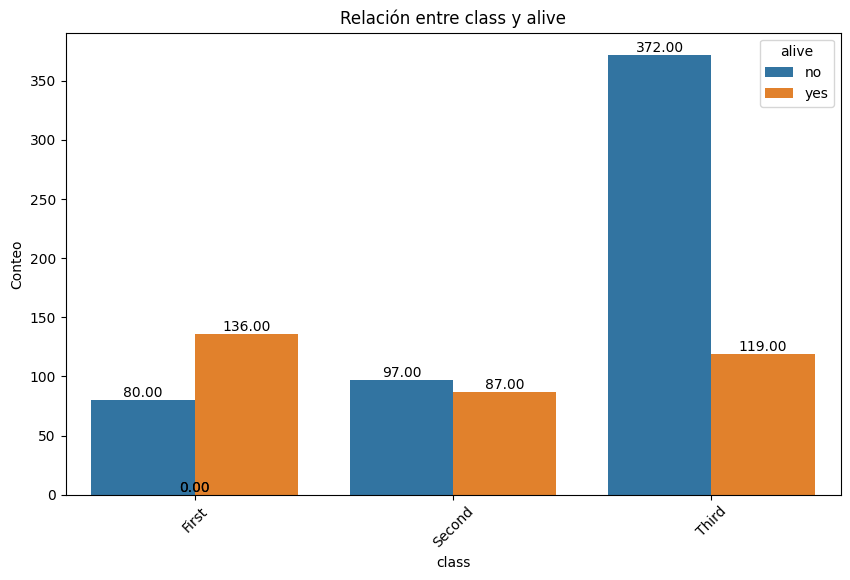

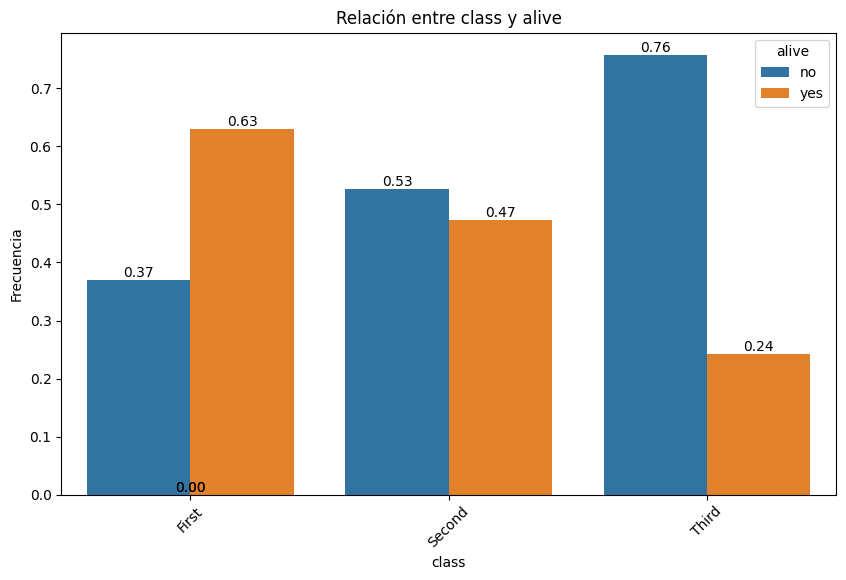

In [15]:
# Repito algunas gráficas para las últimas conclusiones
viz.plot_categorical_relationship_fin(titanic, 'class', 'alive')
viz.plot_categorical_relationship_fin(titanic, 'class', 'alive', relative_freq=True)

- La clase alta es la que más sobrevive, tanto en valores abolutos como relativos. Por tanto vamos a analizar ese dataset concreto

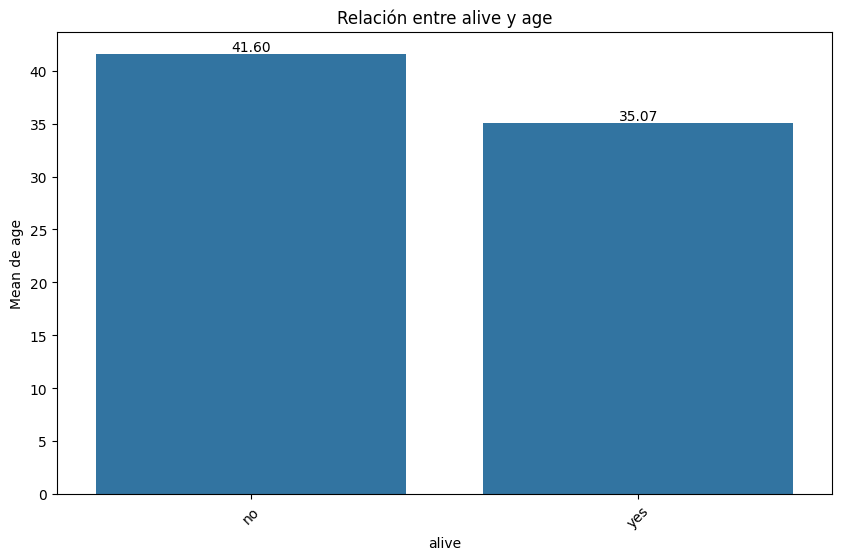

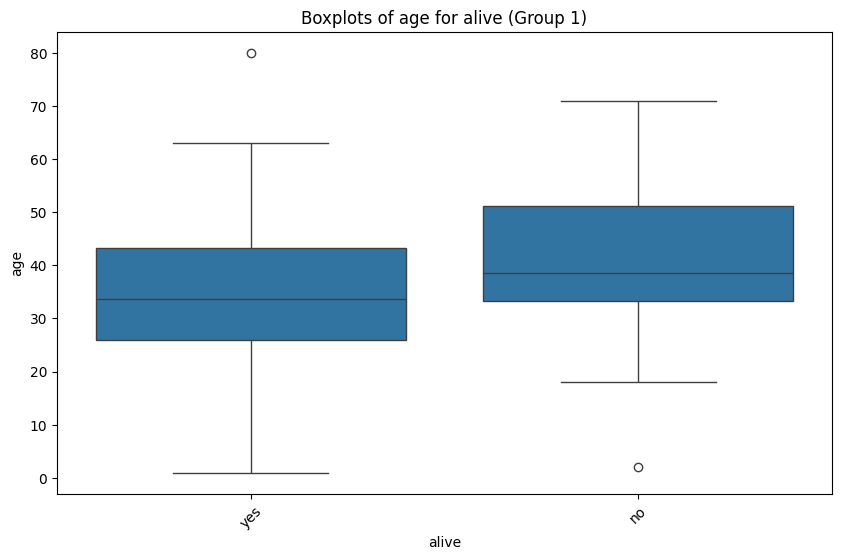

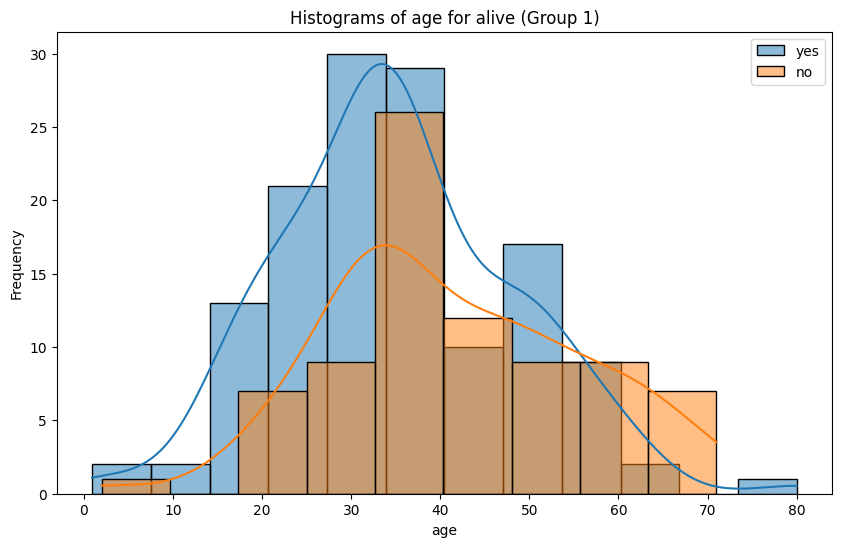

,age,fare,family_members
count,136.000000,136.000000,136.000000
mean,35.065588,95.608029,0.882353
std,13.059142,85.286820,1.033217
min,0.920000,25.929200,0.000000
25%,26.000000,50.985450,0.000000
50%,33.600000,77.958300,1.000000
75%,43.250000,111.481225,1.000000
max,80.000000,512.329200,5.000000


In [16]:
titanic_first_class = titanic.loc[titanic['class'] == 'First', :].copy() # Clase alta

viz.plot_categorical_numerical_relationship(titanic_first_class, 'alive', 'age')
viz.plot_grouped_boxPlots(titanic_first_class, 'alive', 'age')
viz.plot_grouped_histograms(titanic_first_class, 'alive', 'age', 2) # Esta da más información

display(titanic_first_class[titanic_first_class['alive'] == 'yes'].describe())

Conclusiones:
- La clase alta sobrevive más. Y Dentro de esta la edad entre el primer y el tercer cuartil es de 26 a 43 años.

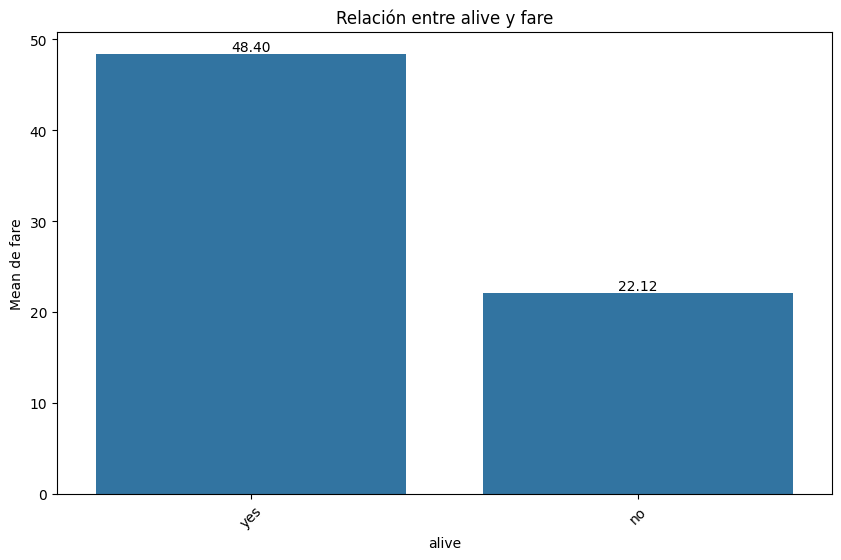

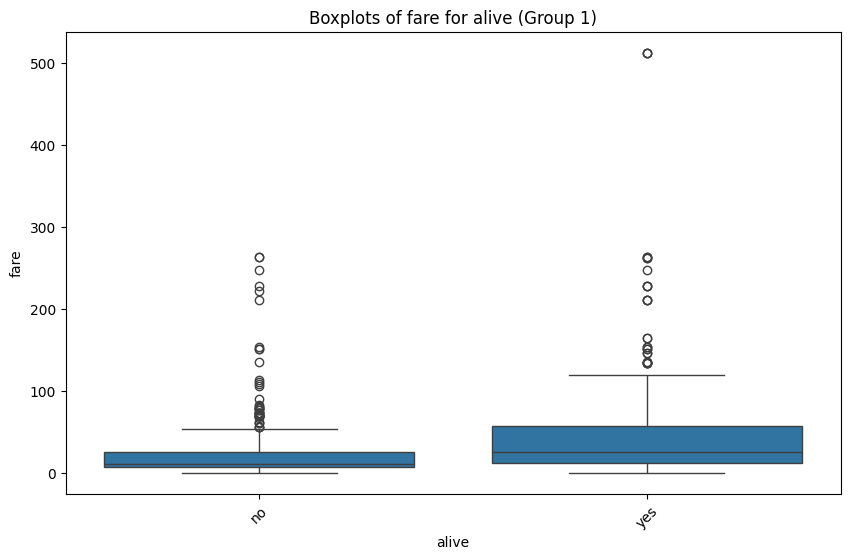

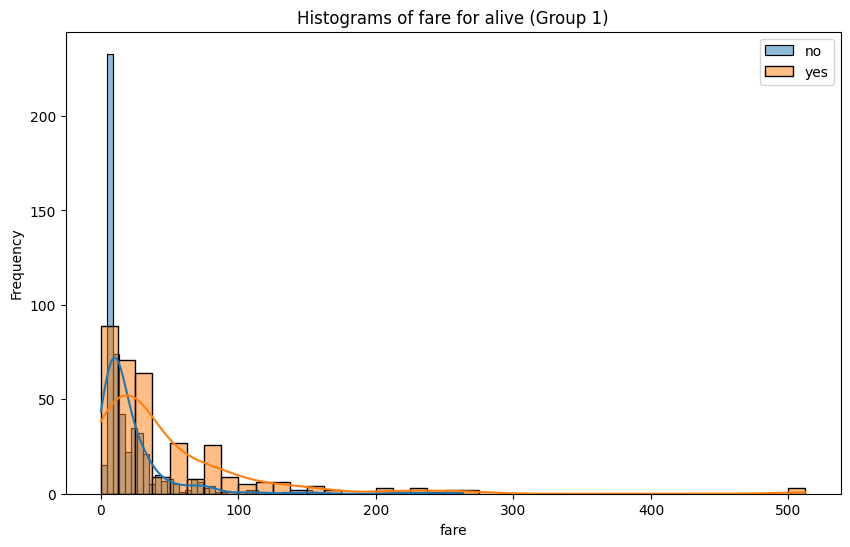

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Análisis de gente que ha invertido MUCHO dinero en el billete


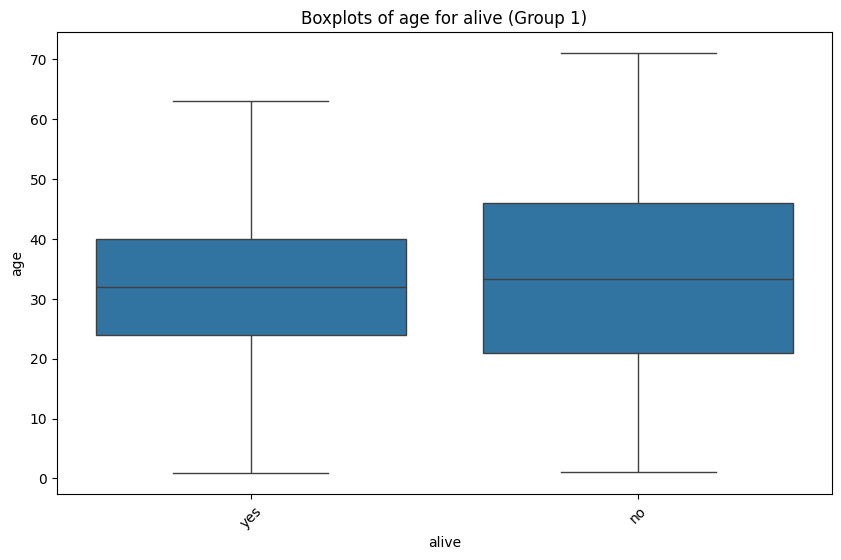

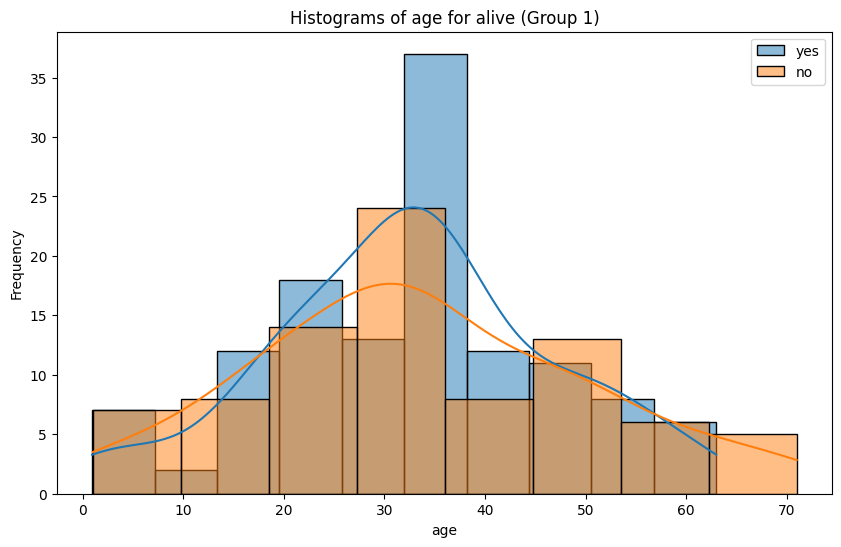

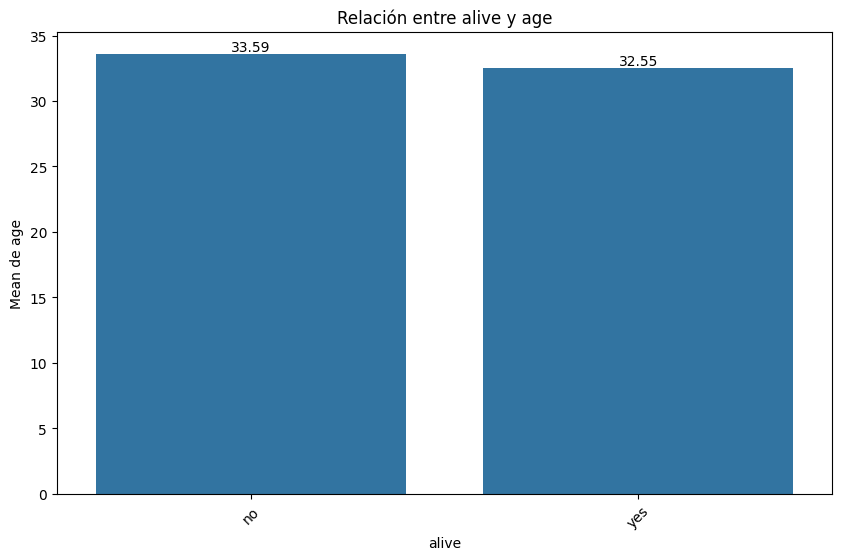

Análisis de gente que ha invertido POCO dinero en el billete


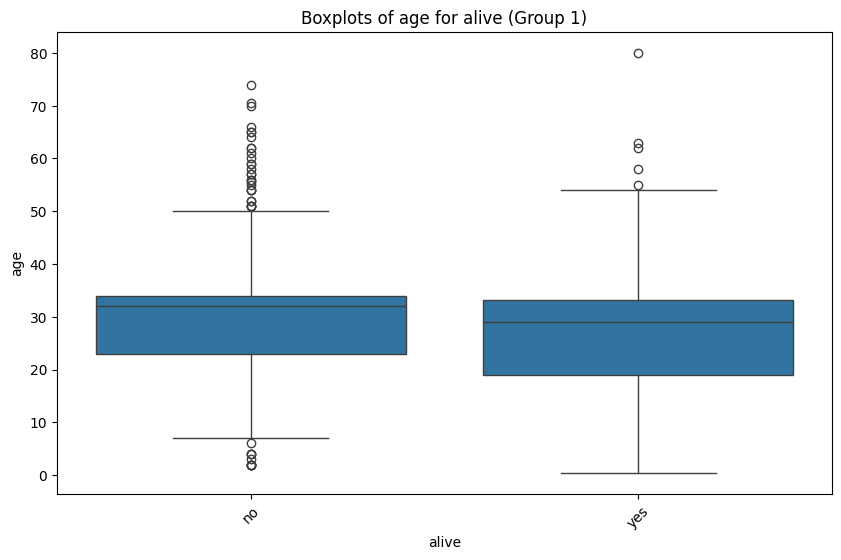

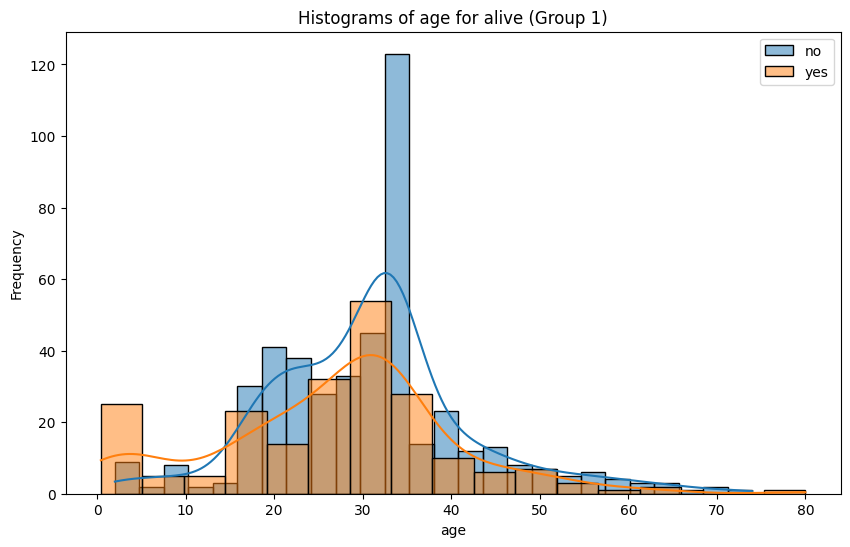

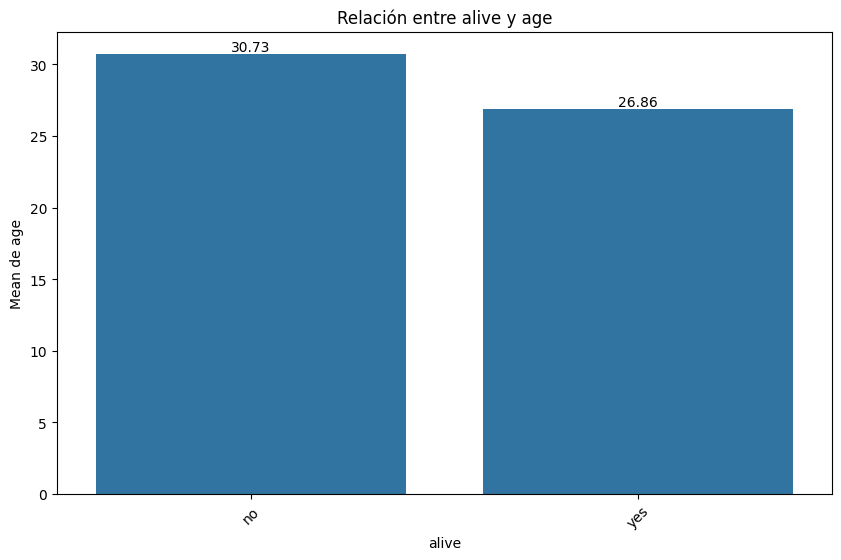

In [17]:
viz.plot_categorical_numerical_relationship(titanic, 'alive', 'fare')
viz.plot_grouped_boxPlots(titanic, 'alive', 'fare')
viz.plot_grouped_histograms(titanic, 'alive', 'fare', 2)

display(titanic['fare'].describe())

# Filtro el dataset usando la media, porque el valor crece bastante debido a los outliers, pero lo hago a posta.
# Quiero ver los resultados de gente que paga bastante por el billete

# Gente rica
print('Análisis de gente que ha invertido MUCHO dinero en el billete')
titanic_high_fare = titanic.loc[titanic['fare'] >= titanic['fare'].mean(), :].copy()

viz.plot_grouped_boxPlots(titanic_high_fare, 'alive', 'age')
viz.plot_grouped_histograms(titanic_high_fare, 'alive', 'age', 2)
viz.plot_categorical_numerical_relationship(titanic_high_fare, 'alive', 'age')

# Gente pobre
print('Análisis de gente que ha invertido POCO dinero en el billete')

titanic_low_fare = titanic.loc[titanic['fare'] < titanic['fare'].mean(), :].copy()

viz.plot_grouped_boxPlots(titanic_low_fare, 'alive', 'age')
viz.plot_grouped_histograms(titanic_low_fare, 'alive', 'age', 2)
viz.plot_categorical_numerical_relationship(titanic_low_fare, 'alive', 'age')

Conclusiones:
- Si hay una relación entre edad y probabilidad de supervivencia.
- Pero fijado el coste del billete a uno relativamente alto (porque he usado la media en vez de la mediana), no parece haber grandes variaciones dentro de cada grupo. Es decir la forma de la gráfica de distribución de edades dentro del grupo que gastó mucho dinero en el billete es similar a la de la gente que gastó poco.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [18]:
viajes_jun = pd.read_csv('./data/dataset_viajes_jun23.csv')
viajes_jun

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


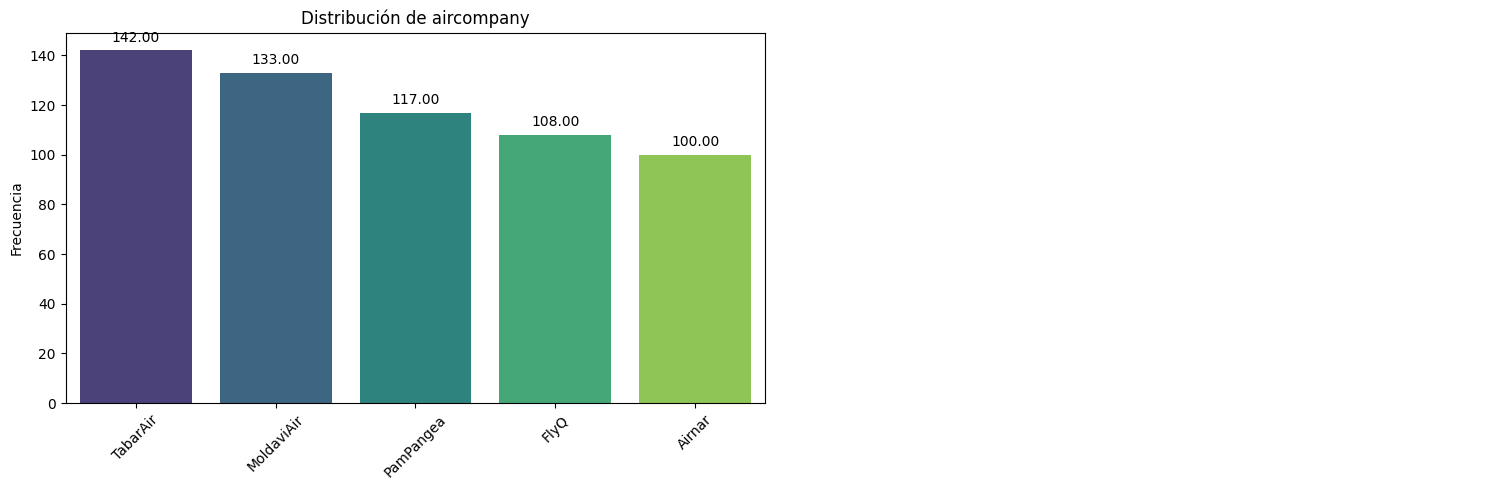

(2,)


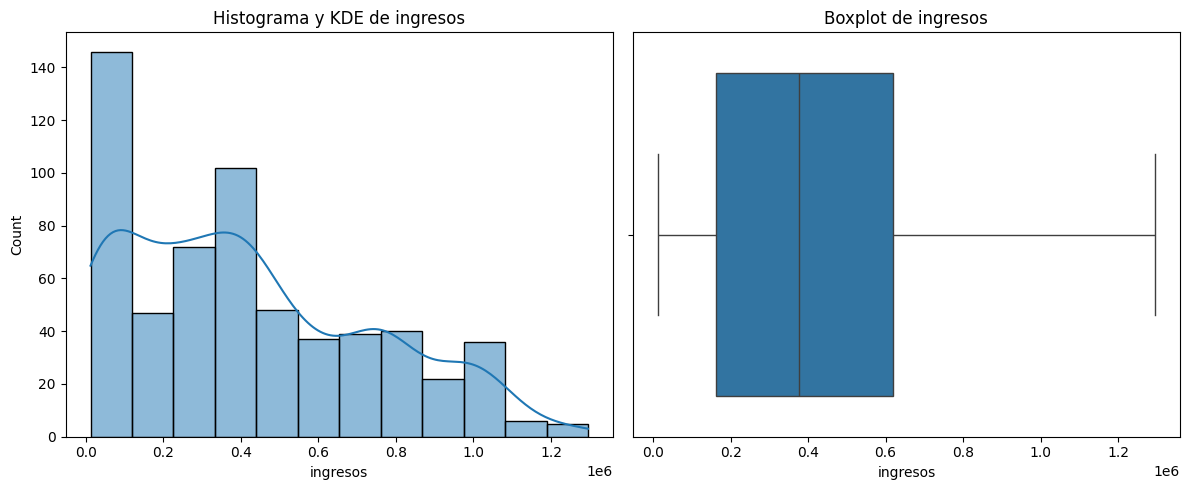

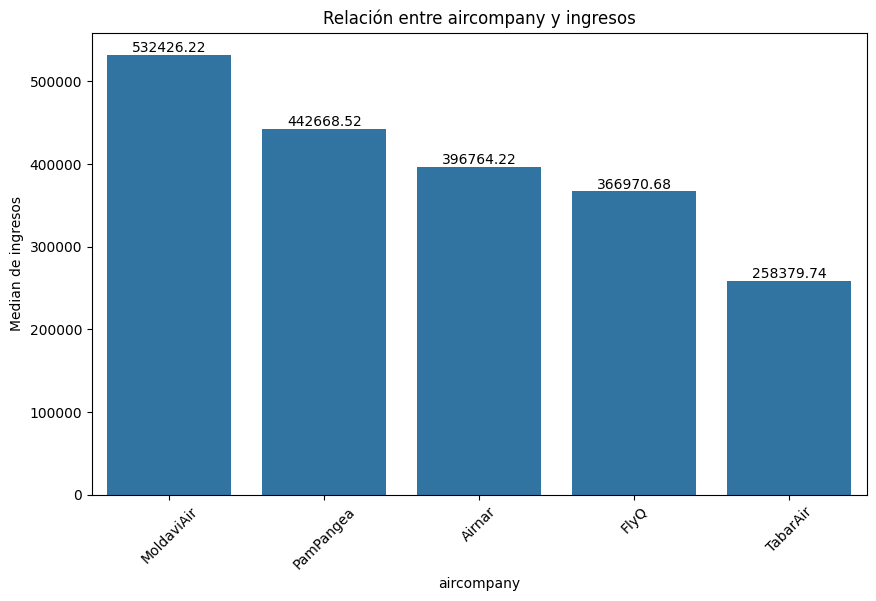

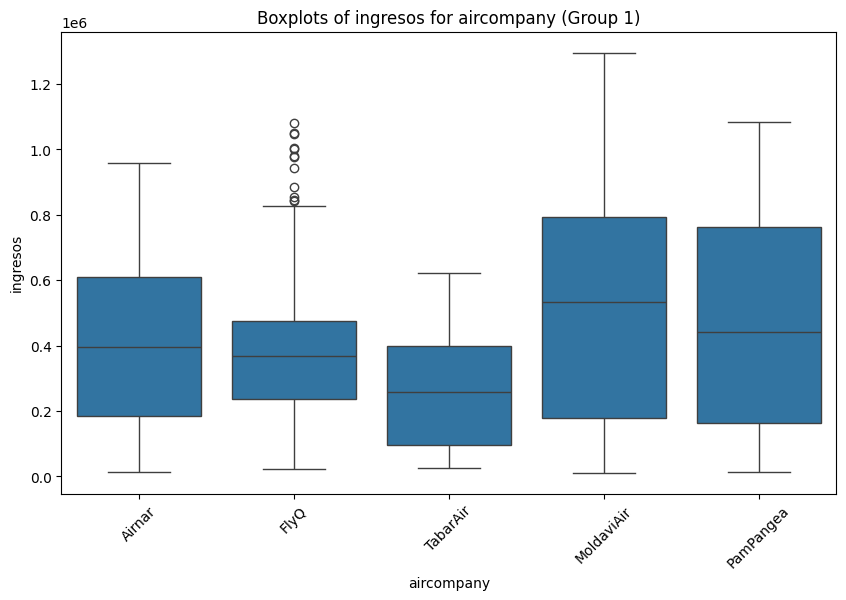

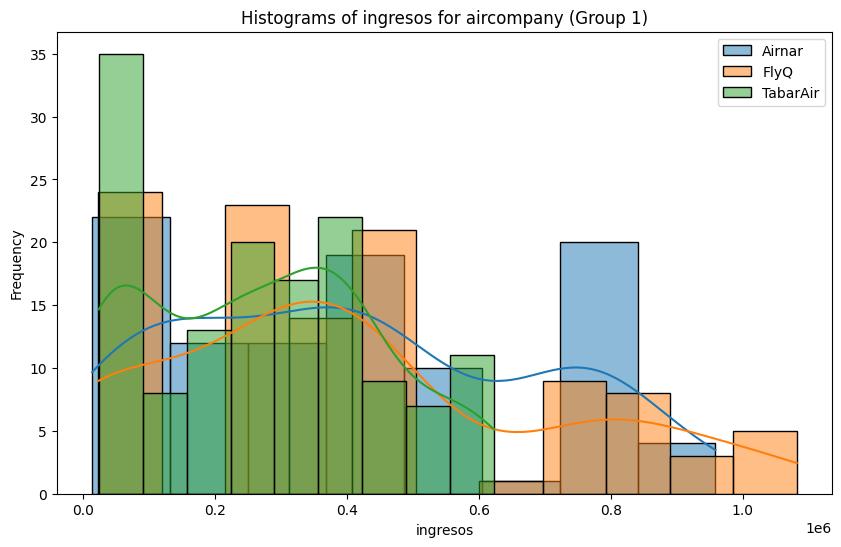

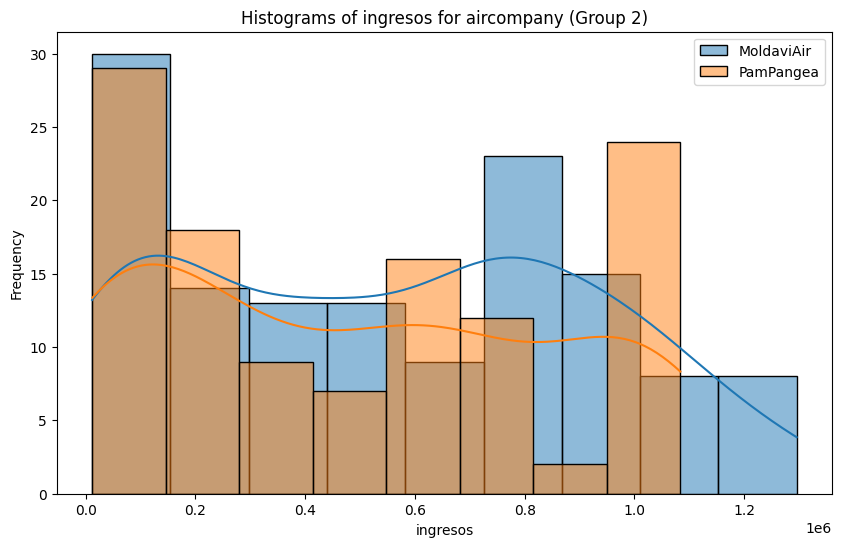

In [19]:
# Análisis independiente
viz.plot_categorical_distribution(viajes_jun, ["aircompany"])   # Viajes por compañía aérea
viz.plot_histogram_KDE_boxPlot(viajes_jun, ['ingresos'])        # Distribución de ingresos

# Análisis combinado
viz.plot_categorical_numerical_relationship(viajes_jun, "aircompany", "ingresos",measure="median")  # Utilizando mediana
viz.plot_grouped_boxPlots(viajes_jun, 'aircompany', 'ingresos')
viz.plot_grouped_histograms(viajes_jun, 'aircompany', 'ingresos', 3)

- Parece que TabarAir es la compañía que más vuelos realiza y sin embargo, la que menos ingresos tiene.

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


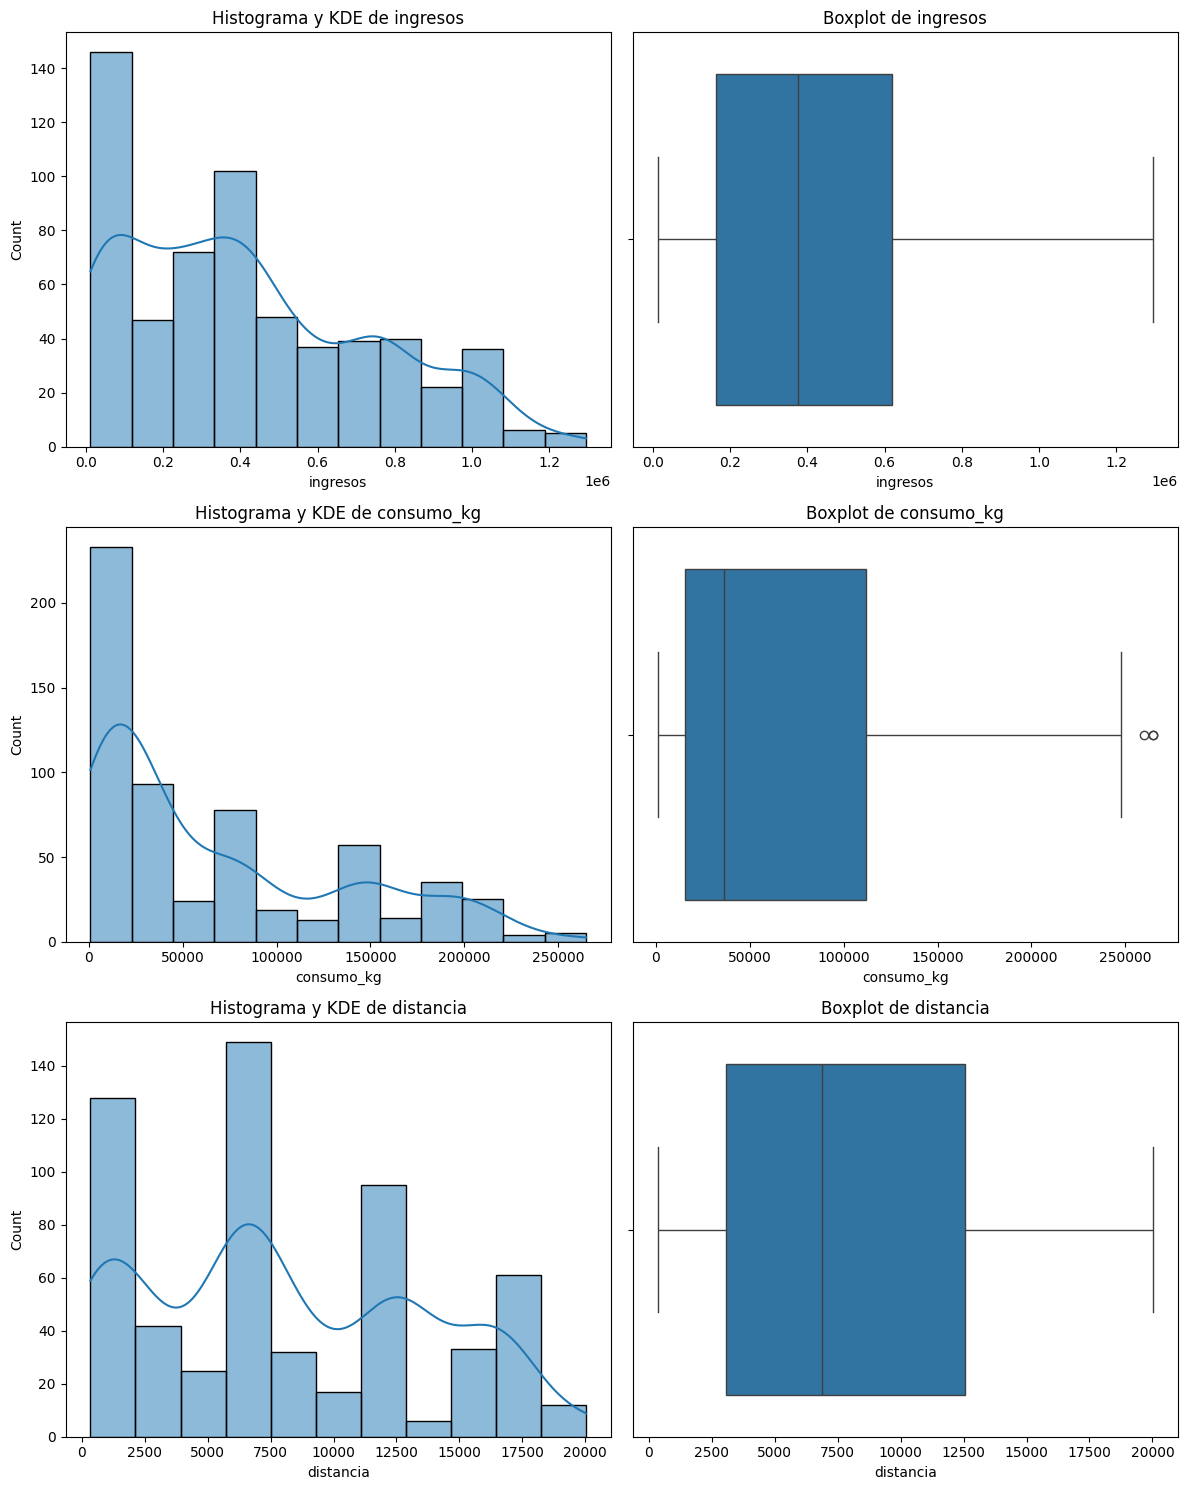

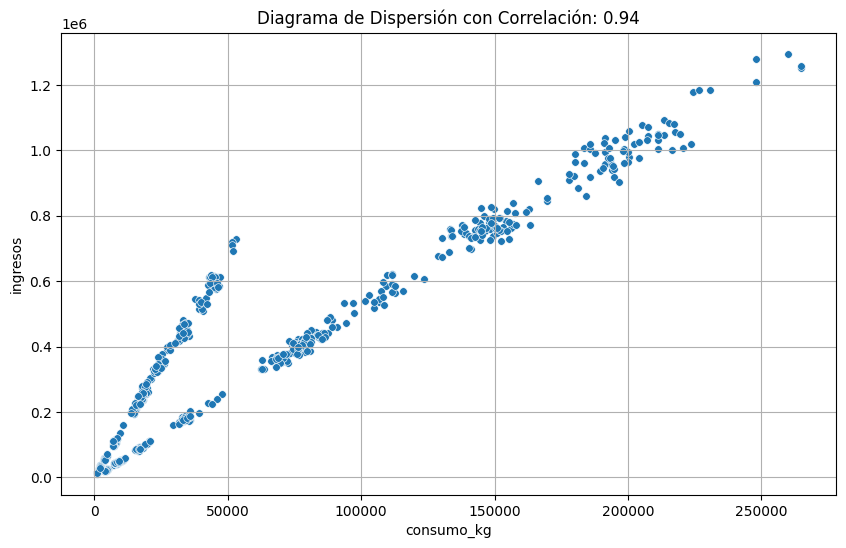

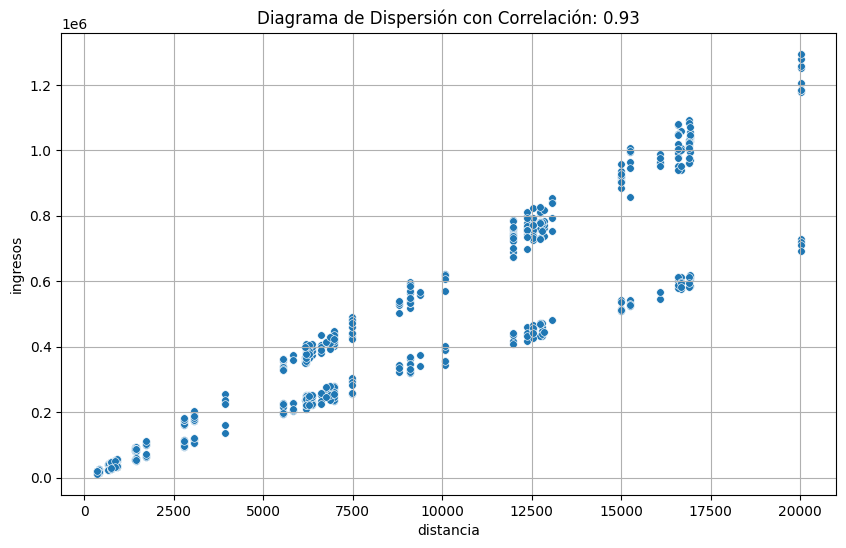

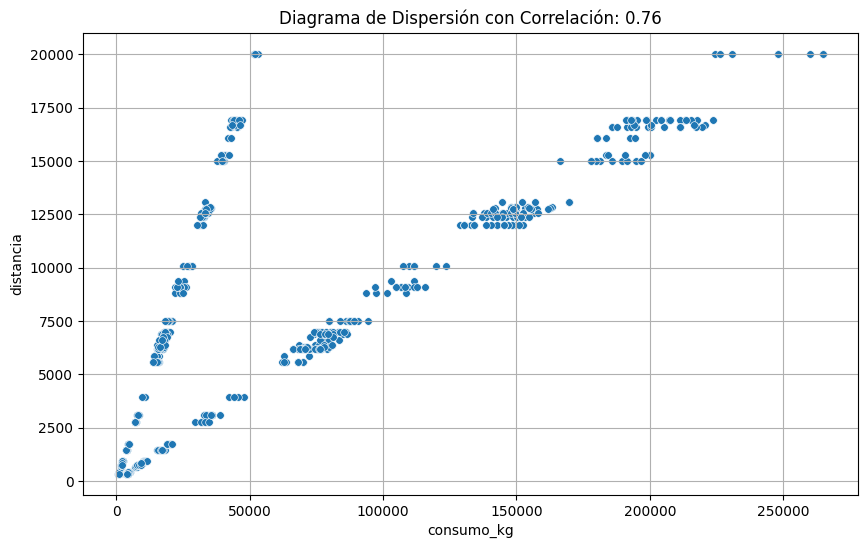

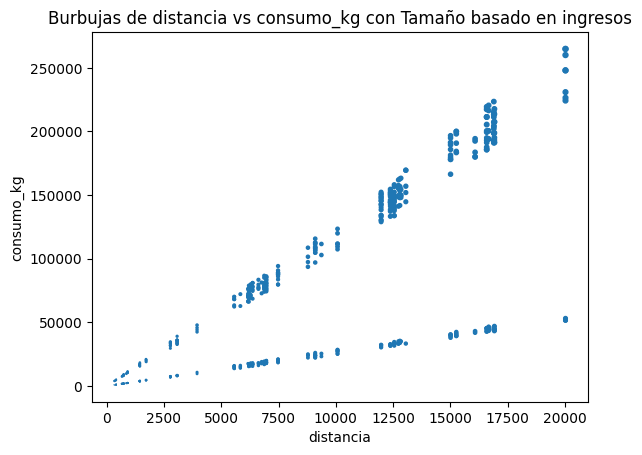

In [20]:
# Diagramas y valores independientes
viz.plot_histogram_KDE_boxPlot(viajes_jun, ["ingresos", "consumo_kg", "distancia"])

# Correlaciones dos a dos
viz.plot_dispersion_with_correlation(viajes_jun,"consumo_kg", "ingresos", tamano_puntos= 30)
viz.plot_dispersion_with_correlation(viajes_jun,"distancia", "ingresos", tamano_puntos= 30)
viz.plot_dispersion_with_correlation(viajes_jun,"consumo_kg", "distancia", tamano_puntos= 30)

# Diagrama de burbujas. El tamaño de las burbujas depende de los ingresos
viz.plot_bubblePlot(viajes_jun,"distancia", "consumo_kg", "ingresos", scale = 100000)

El tamaño de las burbujas depende de los ingresos, se ve la correlación entre distancia y consumo, auque claramene hay una línea de vuelos mucho más eficientes y si nos fijamos en los tamaños de las burbujas de una línea y otra son aparentemente similares. 

Es decir parece y esta sería una gran línea de trabajo, un conjunto de viajes que son más eficientes en todos los términos que otros. 

Pero ahí no acaba el análisis. El siguente paso sería escoger una de las tres, hacerle un *binning* o convertirla a categórica y estaríamos en el análisis multivariante explicado en la sesión anterior. Este caso lo veremos en los ejercicios --> `Práctica obligatoria`

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). 

Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [21]:
viajes_jun.distancia.describe() #Voy a usar estos datos para hacer los bins

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64

In [22]:
# Crear rangos de categorías basados en la distribución
bins = [viajes_jun.distancia.min(), 
        viajes_jun.distancia.quantile(0.25),
        viajes_jun.distancia.quantile(0.5),
        viajes_jun.distancia.quantile(0.75),
        viajes_jun.distancia.max()
        ]
labels = ['CD', 'MD', 'LD', 'MLD'] # Corta, media, larga y muy larga distancia

viajes_jun['cat_vuelo'] = pd.cut(viajes_jun['distancia'], bins=bins, labels=labels, include_lowest=True, right=True)

{'CD':      consumo_kg   ingresos
 0     1028.6919   14232.65
 6      915.2464   13805.52
 9    20339.8200  110108.07
 10    7915.4334  111056.67
 12   32758.1800  184079.01
 ..          ...        ...
 584   4737.8760   70674.57
 588   3960.4032   20749.29
 590   2129.1174   31227.48
 594   2021.8301   28007.41
 596  17229.1396   87307.63
 
 [170 rows x 2 columns],
 'MLD':         consumo_kg    ingresos
 1     33479.132544   468527.19
 5     53148.153240   728045.68
 7    217722.658400  1056735.47
 8     45277.618464   600836.96
 16    51629.634576   719577.55
 ..             ...         ...
 581  211405.969216  1004810.48
 583  192980.964800  1006880.11
 591  194337.718432   952688.76
 592   46352.386080   583465.41
 598  144766.211200   752212.98
 
 [142 rows x 2 columns],
 'LD':        consumo_kg   ingresos
 2    109439.90720  584789.19
 4     86115.74400  438535.07
 11   156721.69440  764998.83
 14    21087.85536  299451.12
 15   109569.23640  619222.23
 ..            ...        .

Categoría de vuelo: CD


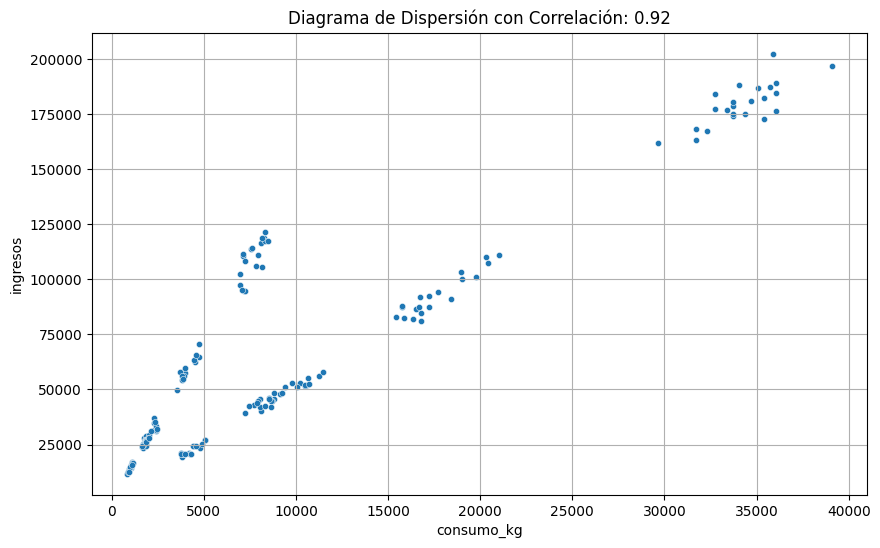

Categoría de vuelo: MLD


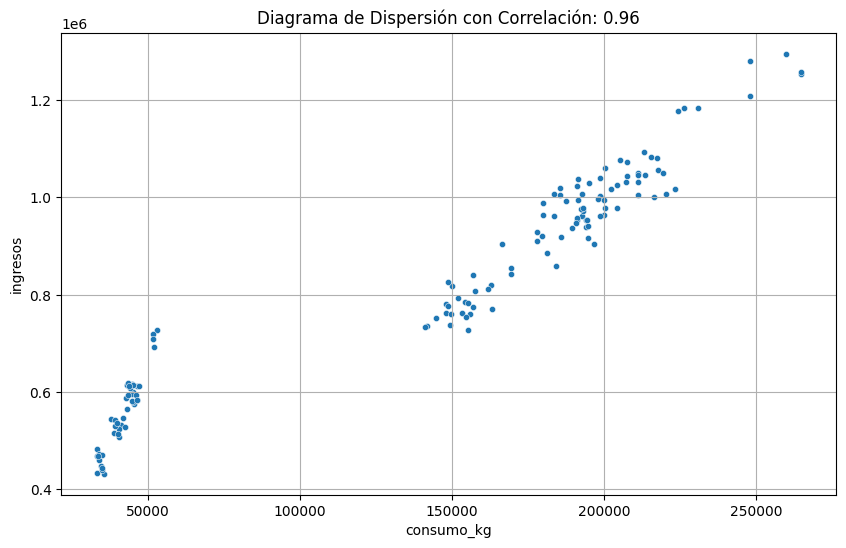

Categoría de vuelo: LD


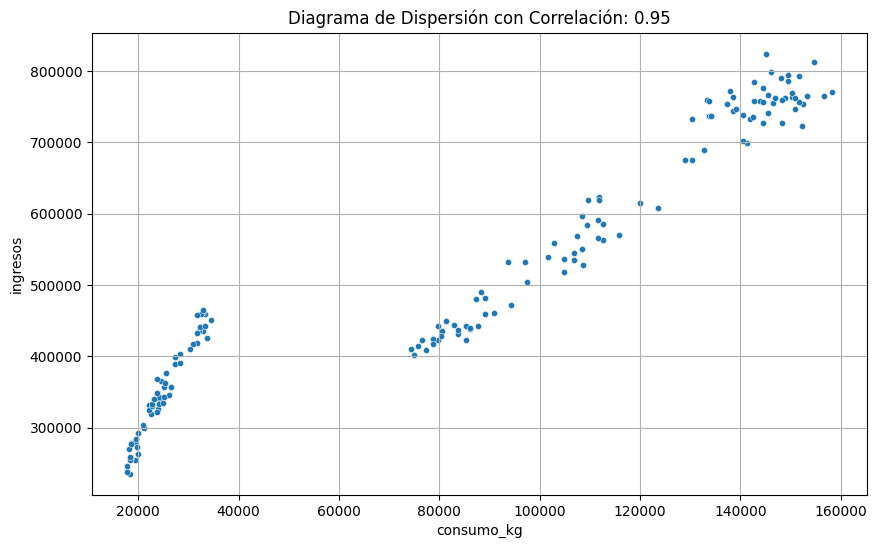

Categoría de vuelo: MD


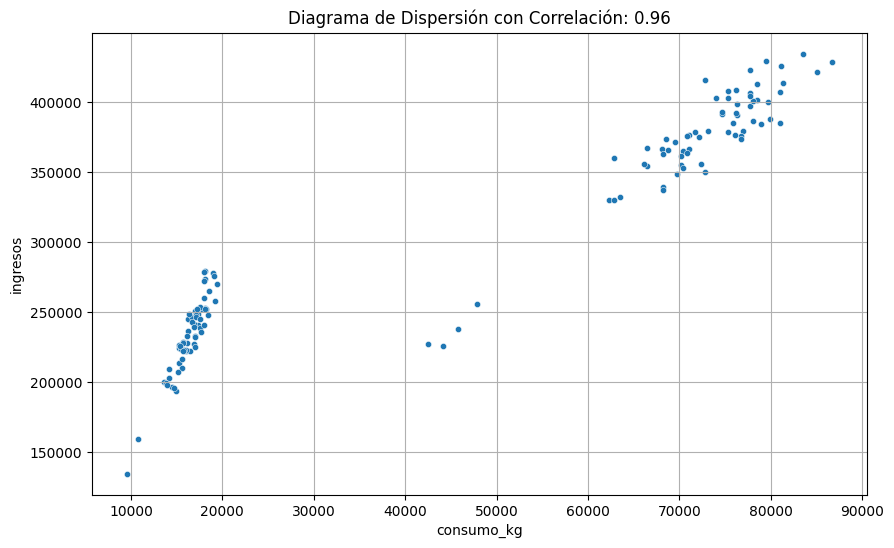

In [23]:
# Nuevo análisis multivariante: 1 variable categórica (cat_vuelos) y 2 numéricas

col_directora = "cat_vuelo"
col_1 = "consumo_kg"
col_2 = "ingresos"

diccionario_multivariante = {}
for valor in viajes_jun[col_directora].unique():
    diccionario_multivariante[valor] = viajes_jun.loc[viajes_jun[col_directora] == valor, [col_1, col_2]] # Ojo al orden quiero ver para cada oferta como es la distribución de educacion
display(diccionario_multivariante)

for valor, df_datos in diccionario_multivariante.items():
    print(f"Categoría de vuelo: {valor}")
    viz.plot_dispersion_with_correlation(df_datos, col_1, col_2, tamano_puntos=20)

- En los cuatro subconjuntos de distancia, los ingresos son mayores cuando el consumo de combustible se reduce. Es decir, se reafirma que los trayectos eficientes en consumo, son los que más ingresos generan

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.